In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [25]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_300+_salary_18-19')

In [26]:
qbs.dtypes

NAME              object
300+ YDS           int64
300+ YDS_rank    float64
salary             int64
dtype: object

In [27]:
qbs.head()

,NAME,300+ YDS,300+ YDS_rank,salary
0,Patrick Mahomes,10,1.0,4106447
1,Ben Roethlisberger,8,3.0,21850000
2,Jared Goff,8,3.0,6984418
3,Matt Ryan,8,3.0,30000000
4,Andrew Luck,7,5.0,24594000


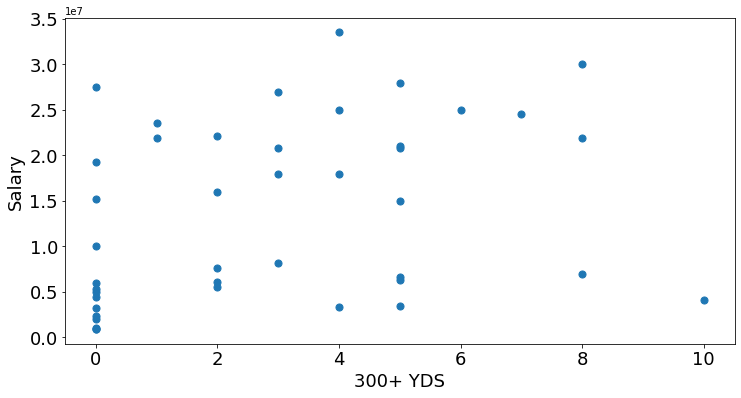

In [28]:
ax = qbs.plot(kind="scatter", x = '300+ YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('300+ YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [29]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['300+ YDS', 'salary']])

In [30]:
X.mean(axis = 0)

array([ 1.05735526e-17, -8.45884209e-17])

In [31]:
X.std(axis = 0)

array([1., 1.])

In [32]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [33]:
km.cluster_centers_

array([[-0.42684013,  0.74166659],
       [ 1.04146899,  1.22465364],
       [ 2.20952538, -0.83603826],
       [-0.89761968, -0.96349686],
       [ 0.57827422, -0.66986378]])

In [34]:
km.predict(X)

array([2, 1, 2, 1, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 0, 1, 4, 0, 0, 4, 0, 0,
       3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3],
      dtype=int32)

In [35]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,300+ YDS,300+ YDS_rank,salary,clusters
0,Patrick Mahomes,10,1.0,4106447,2
1,Ben Roethlisberger,8,3.0,21850000,1
2,Jared Goff,8,3.0,6984418,2
3,Matt Ryan,8,3.0,30000000,1
4,Andrew Luck,7,5.0,24594000,1


In [36]:
ss.inverse_transform(km.cluster_centers_)

array([[1.72727273e+00, 2.08448485e+07],
       [5.77777778e+00, 2.55285000e+07],
       [9.00000000e+00, 5.54543250e+06],
       [4.28571429e-01, 4.30943314e+06],
       [4.50000000e+00, 7.15686983e+06]])

In [37]:
qbs.groupby('clusters')[['300+ YDS', 'salary']].mean()

,300+ YDS,salary
clusters,,
0,1.727273,2.084485e+07
1,5.777778,2.552850e+07
2,9.000000,5.545432e+06
3,0.428571,4.309433e+06
4,4.500000,7.156870e+06


In [38]:
centroids = qbs.groupby('clusters')[['300+ YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

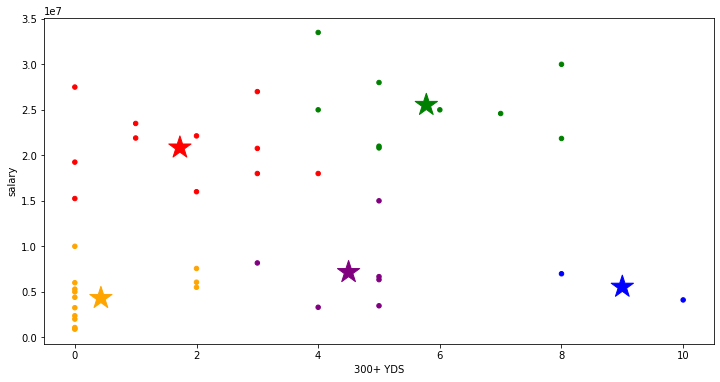

In [39]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = '300+ YDS', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = '300+ YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [40]:
km.inertia_

12.547913751810766

In [41]:
silhouette_score(X, km.labels_)

0.48823887573029967